https://towardsdatascience.com/how-to-use-python-to-figure-out-sample-sizes-for-your-study-871f0a76a19c

In [5]:
import math
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns

def z_calc(p1, p2, n1, n2):
    p_star = (p1*n1 + p2*n2) / (n1 + n2)
    return (p2 - p1) / math.sqrt(p_star*(1 - p_star)*((1.0 / n1) + (1.0 / n2)))

In [6]:
def sample_required(p1, p_diff, alpha):
    if p_diff <= 0:
        raise ValueError("p_diff must be > 0")
    n = 1
    while True:
        z = z_calc(p1, p1+p_diff, n1=n, n2=n)
        p = 1 - stats.norm.cdf(z)
        if p < alpha:
            break
        n += 1
    return n

In [11]:
def sample_required(p1, p_diff, alpha):
    if p_diff <= 0:
        raise ValueError("p_diff must be > 0")
    n = 1
    while True:
        z = z_calc(p1, p1+p_diff, n1=n, n2=n)
        p = 1 - stats.norm.cdf(z)
        if p < alpha:
            break
        n += 1
    return n

In [13]:
#Map how sample size changes as choice of p1 changes, holding all 
#else constant.

p1s = [x*.01 for x in range(96)]
p_diff = 0.05

data = []
for p1 in p1s:
    record = {}
    record['Probability Difference'] = p_diff
    record['Sample Size to Detect Difference'] = sample_required(
                                                p1=p1,
                                                p_diff=.05,
                                                alpha=.05)
    record['Confidence Level'] = '95%'
    record['Initial Probability'] = p1 * 100
    data.append(record)
    
df = pd.DataFrame(data)

[Text(0, 0, '0'),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '5'),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '10'),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '15'),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '20'),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '25'),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '30'),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '35'),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '40'),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '45'),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '50'),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '55'),
 Text(0, 0, ''),
 Text(0, 

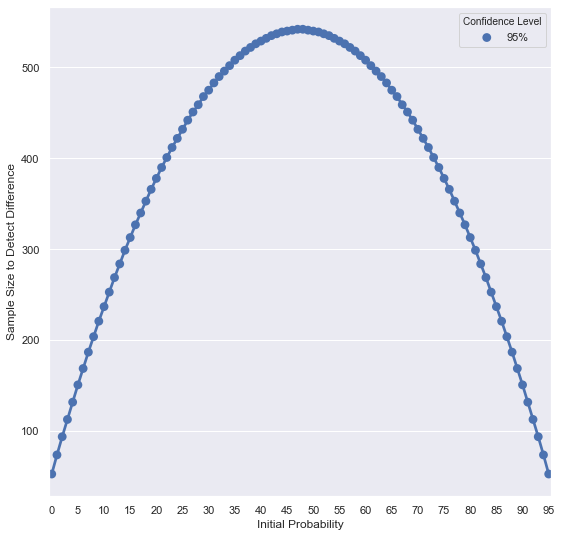

In [17]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(9, 9))
sns.set(style='darkgrid')
labels = []
for i in range(0, 101):
    if i % 5 == 0:
        labels.append(str(i))
    else:
        labels.append('')

plot = sns.pointplot(x='Initial Probability',
            y='Sample Size to Detect Difference',
            hue='Confidence Level', ax = ax,
            data=df)


plot.set_xticklabels(labels=labels)

In [18]:
#Observe probability difference from 2% to 10%
p_diffs = [x*.01 for x in range(2,11)]

data = []
for p_diff in p_diffs:
    record = {}
    record['Probability Difference'] = p_diff * 100
    record['Sample Size to Detect Difference'] = sample_required(p1=.5,
                                                                p_diff=p_diff,
                                                                alpha=.05)
    record['Confidence Level'] = '95%'
    record['Initial probability'] = '50%'
    data.append(record)

for p_diff in p_diffs:
    record = {}
    record['Probability Difference'] = p_diff * 100
    record['Sample Size to Detect Difference'] = sample_required(p1=.5,
                                                                p_diff=p_diff,
                                                                alpha=.01)
    record['Confidence Level'] = '99%'
    record['Initial probability'] = '50%'
    data.append(record)

df = pd.DataFrame(data)

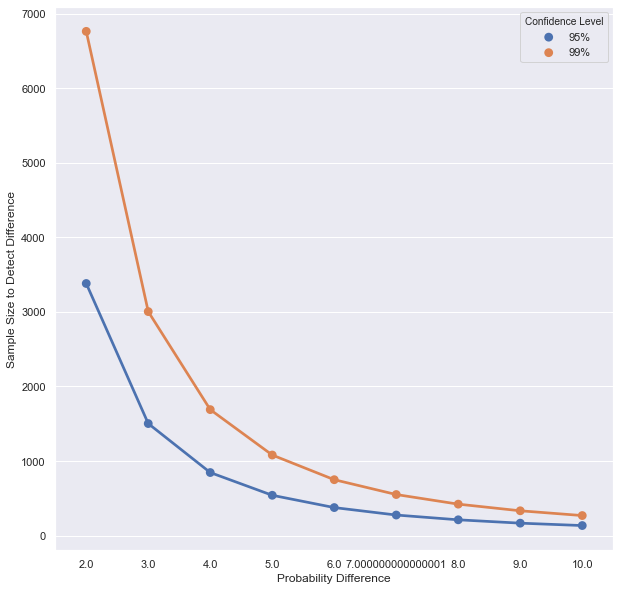

In [19]:

from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize=(10, 10))

sns.set(style='darkgrid')

plot = sns.pointplot(x='Probability Difference',
            y='Sample Size to Detect Difference',
            hue='Confidence Level', ax = ax,
            data=df)

[0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]

In [26]:
#Observe probability difference from 2% to 10%
# p_diffs = [0.001, 0.003, 0.005, 0.007, 0.009, 0.01, 0.03, 0.05, 0.7, 0.09]
p_diffs = [0.009, 0.03, 0.07, 0.1]

data = []
for p_diff in p_diffs:
    record = {}
    record['Probability Difference'] = p_diff * 100
    record['Sample Size to Detect Difference'] = sample_required(p1=.5,
                                                                p_diff=p_diff,
                                                                alpha=.05)
    record['Confidence Level'] = '95%'
    record['Initial probability'] = '50%'
    data.append(record)

for p_diff in p_diffs:
    record = {}
    record['Probability Difference'] = p_diff * 100
    record['Sample Size to Detect Difference'] = sample_required(p1=.5,
                                                                p_diff=p_diff,
                                                                alpha=.01)
    record['Confidence Level'] = '99%'
    record['Initial probability'] = '50%'
    data.append(record)

df = pd.DataFrame(data)

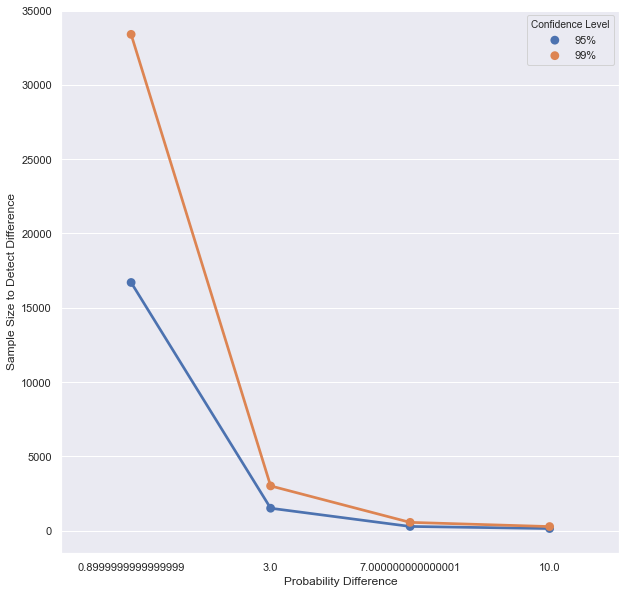

In [27]:

from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize=(10, 10))

sns.set(style='darkgrid')

plot = sns.pointplot(x='Probability Difference',
            y='Sample Size to Detect Difference',
            hue='Confidence Level', ax = ax,
            data=df)